### Risk Management in Cryptocurrency Trading using Binance API

#### Life cycle of Machine learning Project

#### 1) Problem Statement
#### 2) Data Collection
#### 3) Data Preprocessing
#### 4) Exploratory Data Analysis (EDA)
#### 5) Model Training and Evaluation

This notebook will cover up untill EDA. Model training and evaluation are in file model_training.ipynb

### 1) Problem Statement
- Identify and manage risks in cryptocurrency trading by detecting unusual trading patterns and potential anomalies that could indicate market manipulation or other risk factors.

### 2) Data Collection
- Collect historical and real-time trading data from Binance API.
- Data includes price, volume, and other relevant features for various cryptocurrencies.

#### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os

#### Load and inspect the data

In [3]:
os.chdir('C:/Users/gerar/OneDrive/Documentos/GitHub/fraudDetection')  # Set the working directory

def load_data(file_path="data/btc_data.csv"):
    """Load the dataset into a pandas DataFrame."""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} was not found. Run save_data.py first.")
    
    df = pd.read_csv(file_path)
    df["timestamp"] = pd.to_datetime(df["timestamp"])  # Convert timestamps
    return df

def inspect_data(df):
    """Print basic info and statistics."""
    print("First 5 rows:\n", df.head(), "\n")
    print("Data Summary:\n", df.info(), "\n")
    print("Descriptive Statistics:\n", df.describe(), "\n")
    print("Missing Values:\n", df.isnull().sum(), "\n")

if __name__ == "__main__":
    df = load_data()
    inspect_data(df)


First 5 rows:
    timestamp     open     high      low    close       volume     close_time  \
0 2017-08-17  4261.48  4485.39  4200.74  4285.08   795.150377  1503014399999   
1 2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264  1503100799999   
2 2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763  1503187199999   
3 2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022  1503273599999   
4 2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060  1503359999999   

   quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
0        3.454770e+06              3427                   616.248541   
1        5.086958e+06              5233                   972.868710   
2        1.549484e+06              2153                   274.336042   
3        1.930364e+06              2321                   376.795947   
4        2.797232e+06              3972                   557.356107   

   taker_buy_quote_asset_volume  ignore  
0                  2.678216e+

#### Visualizing Price Trends

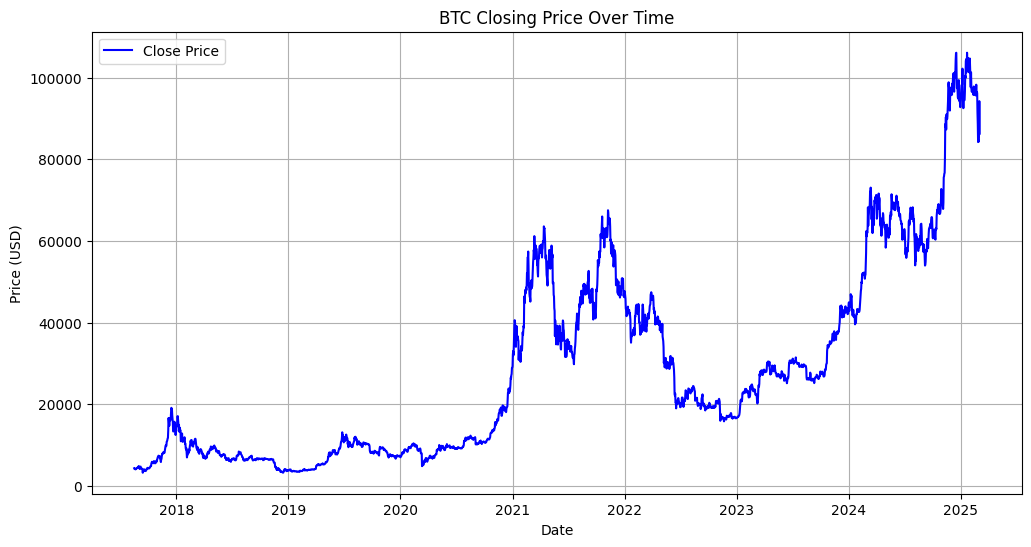

In [4]:
def plot_price_trends(df):
    """Plot historical close prices."""
    plt.figure(figsize=(12, 6))
    plt.plot(df["timestamp"], df["close"], label="Close Price", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.title("BTC Closing Price Over Time")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    df = load_data()
    plot_price_trends(df)


#### Volume Analysis

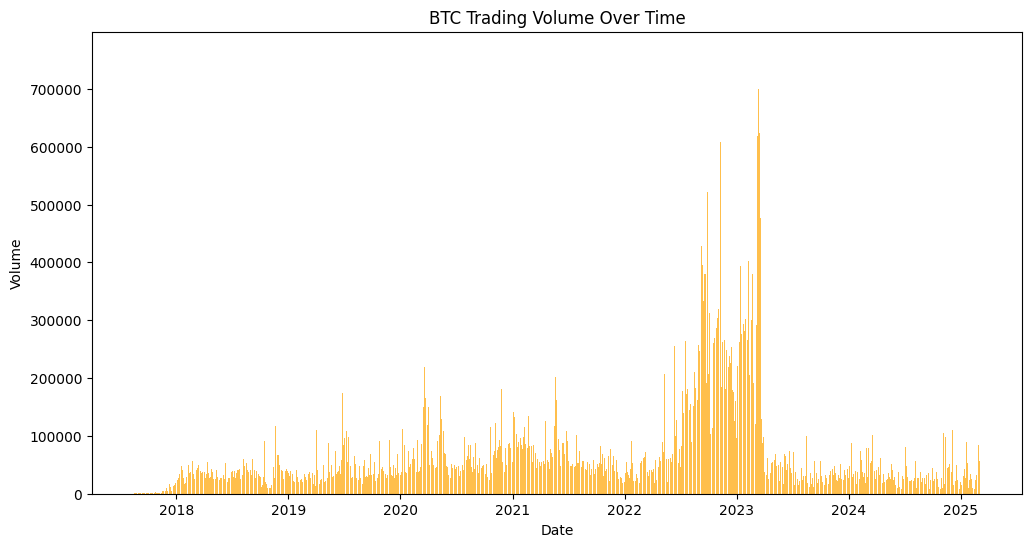

In [5]:
def plot_trading_volume(df):
    """Plot trading volume over time."""
    plt.figure(figsize=(12, 6))
    plt.bar(df["timestamp"], df["volume"], color="orange", alpha=0.7)
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.title("BTC Trading Volume Over Time")
    plt.show()

if __name__ == "__main__":
    df = load_data()
    plot_trading_volume(df)




#### Correlation Matrix

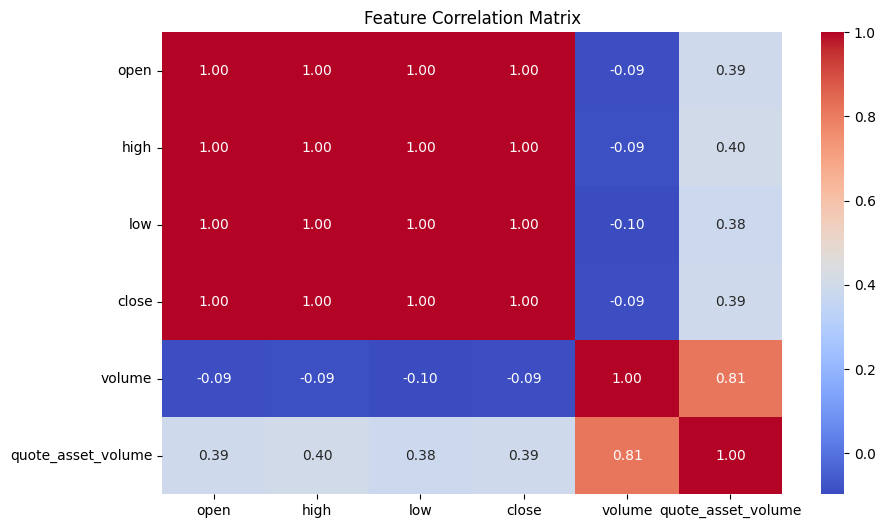

In [6]:
def plot_correlation_matrix(df):
    """Plot a heatmap to show correlations between features."""
    numeric_cols = ["open", "high", "low", "close", "volume", "quote_asset_volume"]
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Matrix")
    plt.show()

if __name__ == "__main__":
    df = load_data()
    plot_correlation_matrix(df)


#### Detecting Anomalies

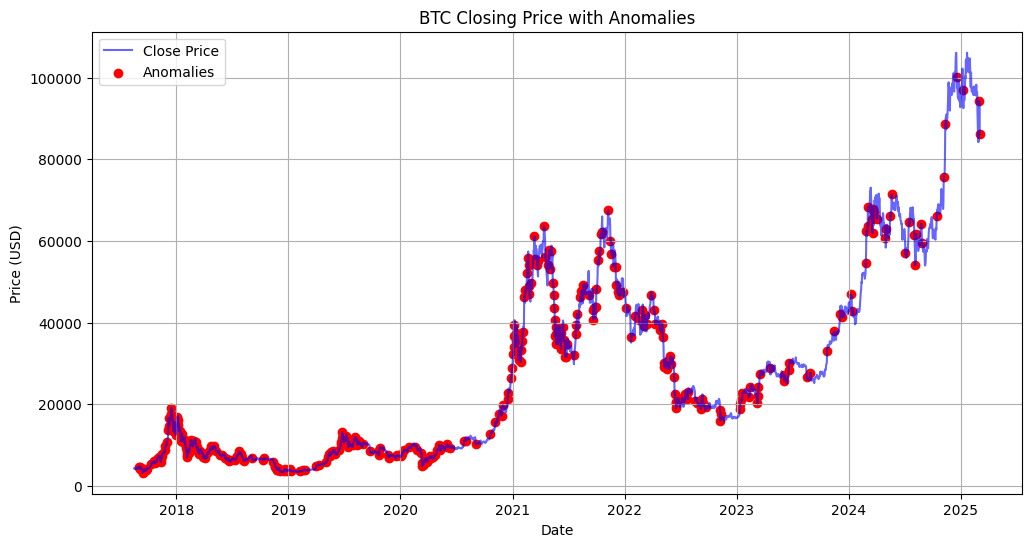

Potential anomalies detected on these dates:
       timestamp      close  daily_return
16   2017-09-02    4472.14     -0.075031
18   2017-09-04    4100.11     -0.090699
19   2017-09-05    4366.47      0.064964
20   2017-09-06    4619.77      0.058010
22   2017-09-08    4282.80     -0.087136
...         ...        ...           ...
2643 2024-11-11   88647.99      0.102998
2680 2024-12-18  100204.01     -0.055870
2700 2025-01-07   96954.61     -0.051655
2754 2025-03-02   94270.00      0.095341
2755 2025-03-03   86308.24     -0.084457

[368 rows x 3 columns]


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data():
    file_path = 'c:/Users/gerar/OneDrive/Documentos/GitHub/fraudDetection/data/btc_data.csv'
    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    return df

def detect_price_anomalies(df, threshold=0.05):
    """Identify potential anomalies based on large daily price movements."""
    df["daily_return"] = df["close"].pct_change()
    anomalies = df[abs(df["daily_return"]) > threshold]
    
    plt.figure(figsize=(12, 6))
    plt.plot(df["timestamp"], df["close"], label="Close Price", color="blue", alpha=0.6)
    plt.scatter(anomalies["timestamp"], anomalies["close"], color="red", label="Anomalies", marker="o")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.title("BTC Closing Price with Anomalies")
    plt.legend()
    plt.grid()
    plt.show()
    
    print("Potential anomalies detected on these dates:\n", anomalies[["timestamp", "close", "daily_return"]])

if __name__ == "__main__":
    df = load_data()
    detect_price_anomalies(df)

#### Rolling Volatility

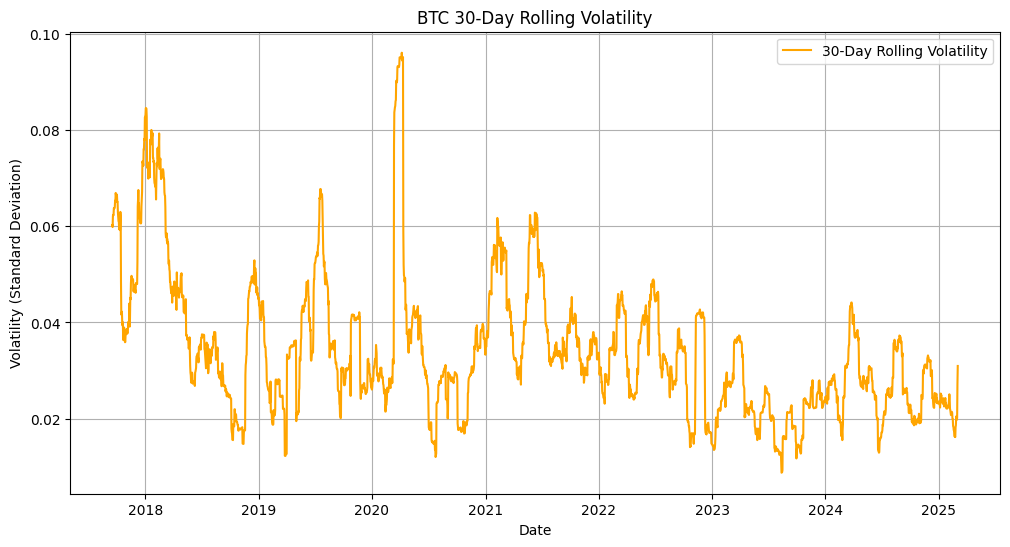

In [8]:
def plot_rolling_volatility(df, window=30):
    """Plots the rolling volatility of BTC based on daily returns."""
    # Calculate the rolling standard deviation of daily returns
    df["rolling_volatility"] = df["daily_return"].rolling(window=window).std()
    df["daily_return"] = df["close"].pct_change()

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(df["timestamp"], df["rolling_volatility"], label=f"{window}-Day Rolling Volatility", color="orange")
    
    # Set plot labels and title
    plt.xlabel("Date")
    plt.ylabel("Volatility (Standard Deviation)")
    plt.title(f"BTC {window}-Day Rolling Volatility")
    plt.legend()
    plt.grid()
    plt.show()

# Run the function
plot_rolling_volatility(df)

### Import FTT, ETH and  XRP Data

In [9]:
# List of filenames to load
filenames = ["btc_data.csv", "ftt_data.csv", "eth_data.csv", "xrp_data.csv"]

# Load and inspect data for each file
for filename in filenames:
    file_path = os.path.join("data", filename)
    df = pd.read_csv(file_path, parse_dates=["timestamp"])
    
    print(f"\nData for {filename}:")
    print(df.head())
    print(df.info())
    print(df.describe())
    print(df.isnull().sum())


Data for btc_data.csv:
   timestamp     open     high      low    close       volume     close_time  \
0 2017-08-17  4261.48  4485.39  4200.74  4285.08   795.150377  1503014399999   
1 2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264  1503100799999   
2 2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763  1503187199999   
3 2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022  1503273599999   
4 2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060  1503359999999   

   quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
0        3.454770e+06              3427                   616.248541   
1        5.086958e+06              5233                   972.868710   
2        1.549484e+06              2153                   274.336042   
3        1.930364e+06              2321                   376.795947   
4        2.797232e+06              3972                   557.356107   

   taker_buy_quote_asset_volume  ignore  
0                  2

### 3) Data Preprocessing

#### Create Dictionaries and Preprocess Data

In [10]:
# Dictionary to store dataframes
dataframes = {}

# Load and preprocess data for each file
for filename in filenames:
    file_path = os.path.join("data", filename)
    df = pd.read_csv(file_path, parse_dates=["timestamp"])
    
    # Calculate daily returns and rolling volatility
    df['daily_return'] = df['close'].pct_change()
    df['rolling_volatility'] = df['daily_return'].rolling(window=30).std()
    
    # Store the dataframe in the dictionary
    symbol = filename.split('_')[0]  # Extract symbol from filename
    dataframes[symbol] = df

    print(f"\nData for {filename}:")
    print(df.head())
    print(df.info())
    print(df.describe())
    print(df.isnull().sum())


Data for btc_data.csv:
   timestamp     open     high      low    close       volume     close_time  \
0 2017-08-17  4261.48  4485.39  4200.74  4285.08   795.150377  1503014399999   
1 2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264  1503100799999   
2 2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763  1503187199999   
3 2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022  1503273599999   
4 2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060  1503359999999   

   quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
0        3.454770e+06              3427                   616.248541   
1        5.086958e+06              5233                   972.868710   
2        1.549484e+06              2153                   274.336042   
3        1.930364e+06              2321                   376.795947   
4        2.797232e+06              3972                   557.356107   

   taker_buy_quote_asset_volume  ignore  daily_return  rolling

### 4) Exploratory Data Analysis

#### Plot Integrated Data

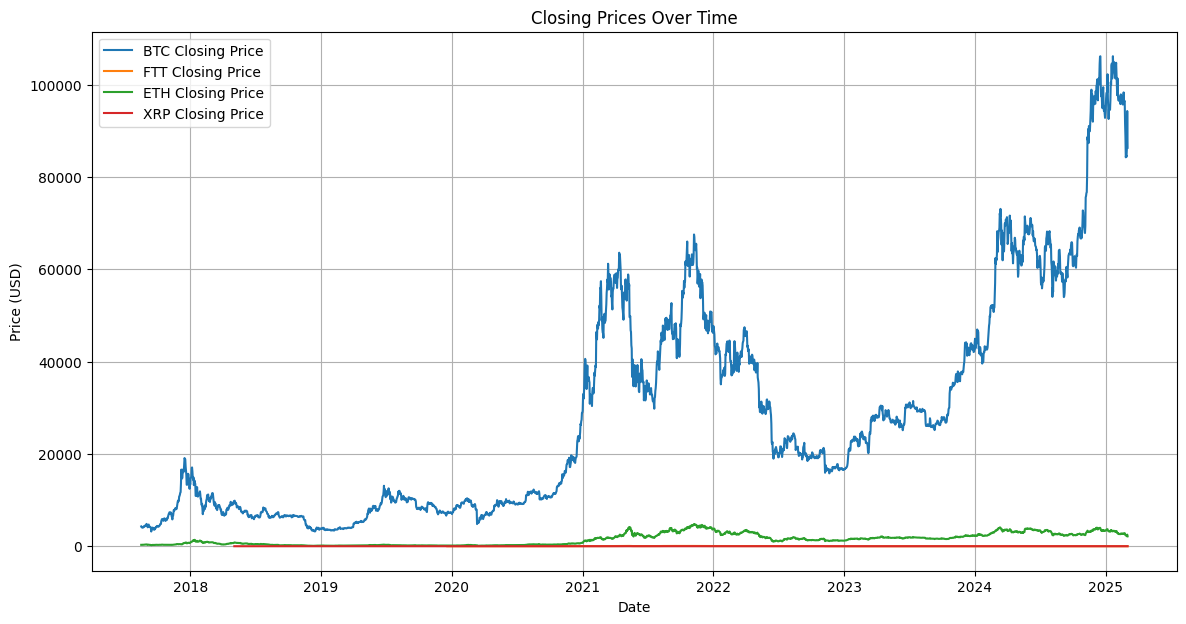

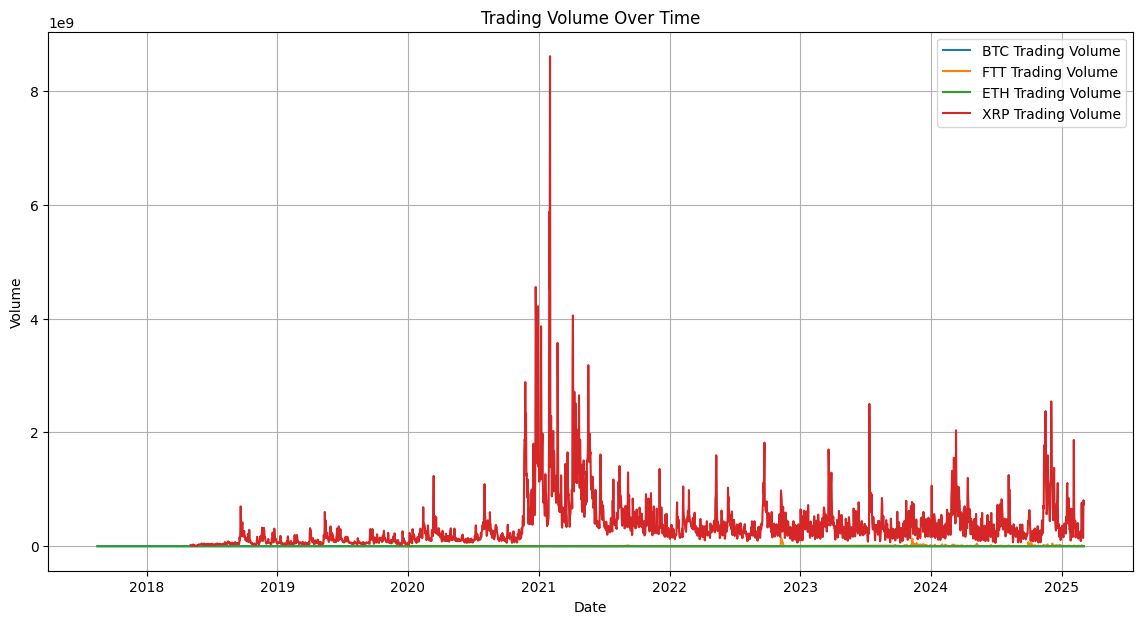

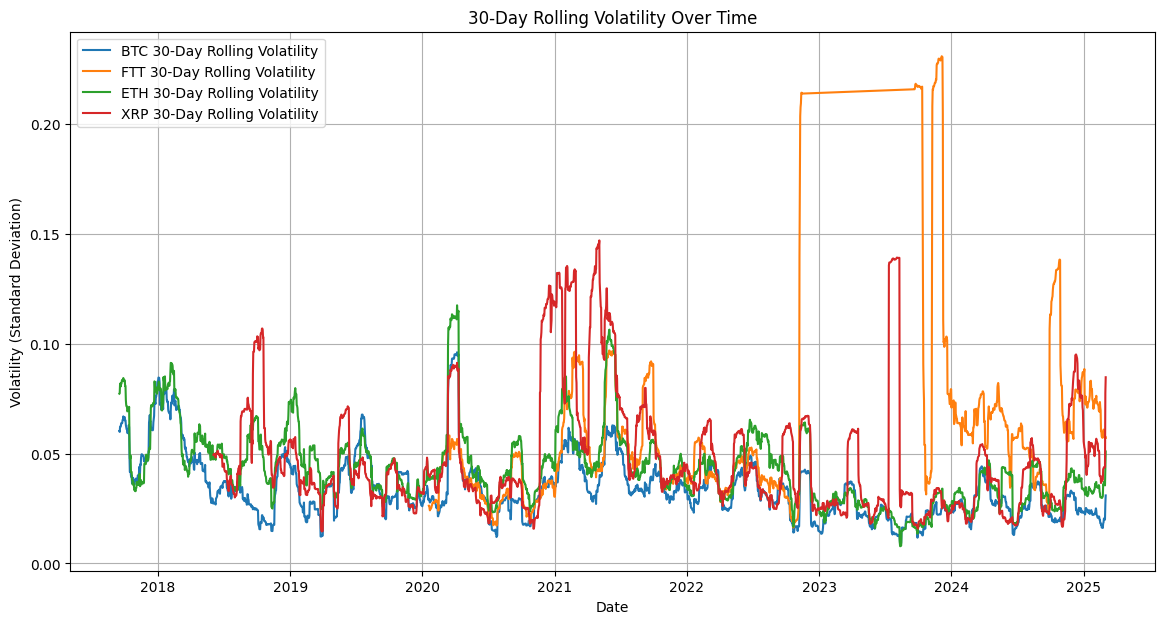

In [11]:
# Plot time series for closing prices
plt.figure(figsize=(14, 7))
for symbol, df in dataframes.items():
    plt.plot(df["timestamp"], df["close"], label=f"{symbol.upper()} Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Closing Prices Over Time")
plt.legend()
plt.grid()
plt.show()

# Plot time series for trading volume
plt.figure(figsize=(14, 7))
for symbol, df in dataframes.items():
    plt.plot(df["timestamp"], df["volume"], label=f"{symbol.upper()} Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Trading Volume Over Time")
plt.legend()
plt.grid()
plt.show()

# Plot time series for rolling volatility
plt.figure(figsize=(14, 7))
for symbol, df in dataframes.items():
    plt.plot(df["timestamp"], df["rolling_volatility"], label=f"{symbol.upper()} 30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.title("30-Day Rolling Volatility Over Time")
plt.legend()
plt.grid()
plt.show()

#### Normalizing Data

In [12]:
from sklearn.preprocessing import MinMaxScaler

# List of filenames to load
filenames = ["btc_data.csv", "ftt_data.csv", "eth_data.csv", "xrp_data.csv"]

# Dictionary to store dataframes
dataframes = {}

# Load and preprocess data for each file
for filename in filenames:
    file_path = os.path.join("data", filename)
    df = pd.read_csv(file_path, parse_dates=["timestamp"])
    
    # Calculate daily returns and rolling volatility
    df['daily_return'] = df['close'].pct_change()
    df['rolling_volatility'] = df['daily_return'].rolling(window=30).std()
    
    # Store the dataframe in the dictionary
    symbol = filename.split('_')[0]  # Extract symbol from filename
    dataframes[symbol] = df

    print(f"\nData for {filename}:")
    print(df.head())
    print(df.info())
    print(df.describe())
    print(df.isnull().sum())

# Normalize the closing prices and trading volumes
scaler = MinMaxScaler()

for symbol, df in dataframes.items():
    df['normalized_close'] = scaler.fit_transform(df[['close']])
    df['normalized_volume'] = scaler.fit_transform(df[['volume']])


Data for btc_data.csv:
   timestamp     open     high      low    close       volume     close_time  \
0 2017-08-17  4261.48  4485.39  4200.74  4285.08   795.150377  1503014399999   
1 2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264  1503100799999   
2 2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763  1503187199999   
3 2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022  1503273599999   
4 2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060  1503359999999   

   quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
0        3.454770e+06              3427                   616.248541   
1        5.086958e+06              5233                   972.868710   
2        1.549484e+06              2153                   274.336042   
3        1.930364e+06              2321                   376.795947   
4        2.797232e+06              3972                   557.356107   

   taker_buy_quote_asset_volume  ignore  daily_return  rolling

#### Plot Nomalized Data

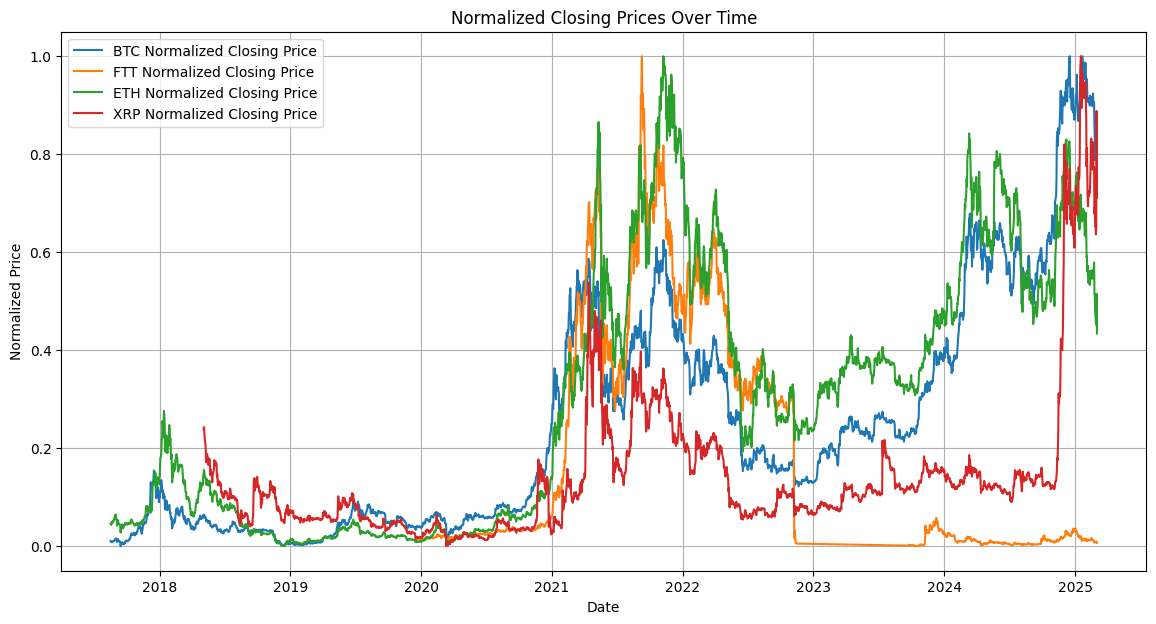

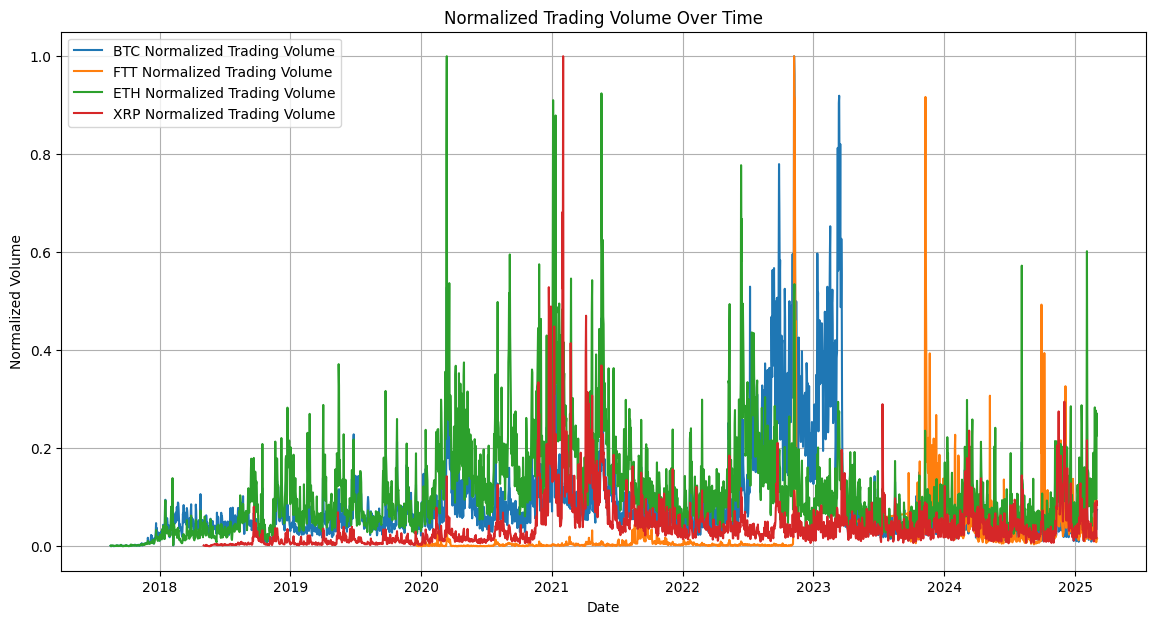

In [13]:
# Plot time series for normalized closing prices
plt.figure(figsize=(14, 7))
for symbol, df in dataframes.items():
    plt.plot(df["timestamp"], df["normalized_close"], label=f"{symbol.upper()} Normalized Closing Price")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.title("Normalized Closing Prices Over Time")
plt.legend()
plt.grid()
plt.show()

# Plot time series for normalized trading volume
plt.figure(figsize=(14, 7))
for symbol, df in dataframes.items():
    plt.plot(df["timestamp"], df["normalized_volume"], label=f"{symbol.upper()} Normalized Trading Volume")
plt.xlabel("Date")
plt.ylabel("Normalized Volume")
plt.title("Normalized Trading Volume Over Time")
plt.legend()
plt.grid()
plt.show()

### Corelation Matrix of Closing Prices

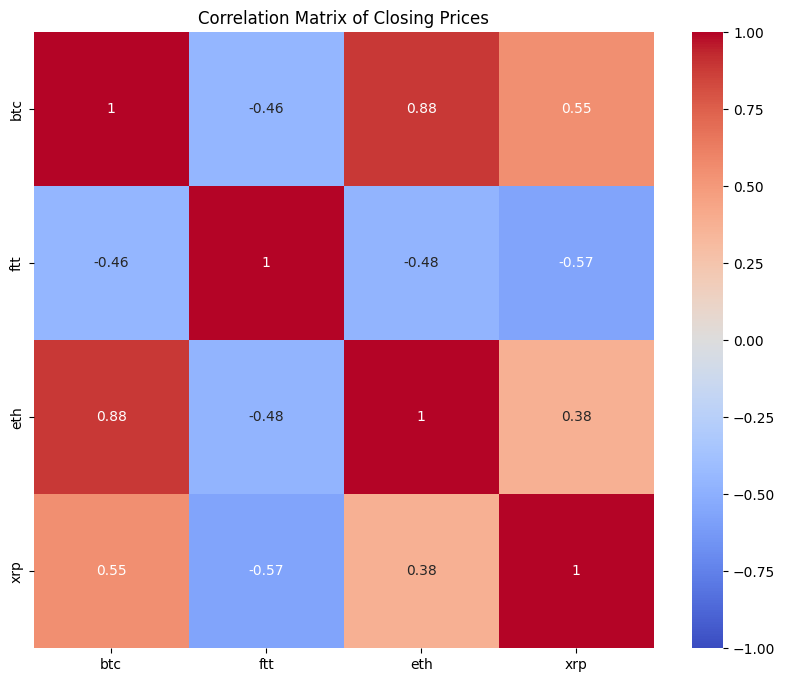

In [14]:
import seaborn as sns

# Combine closing prices into a single DataFrame
closing_prices = pd.DataFrame({symbol: df['close'] for symbol, df in dataframes.items()})

# Calculate the correlation matrix
correlation_matrix = closing_prices.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Closing Prices")
plt.show()

#### Rolling Correlation

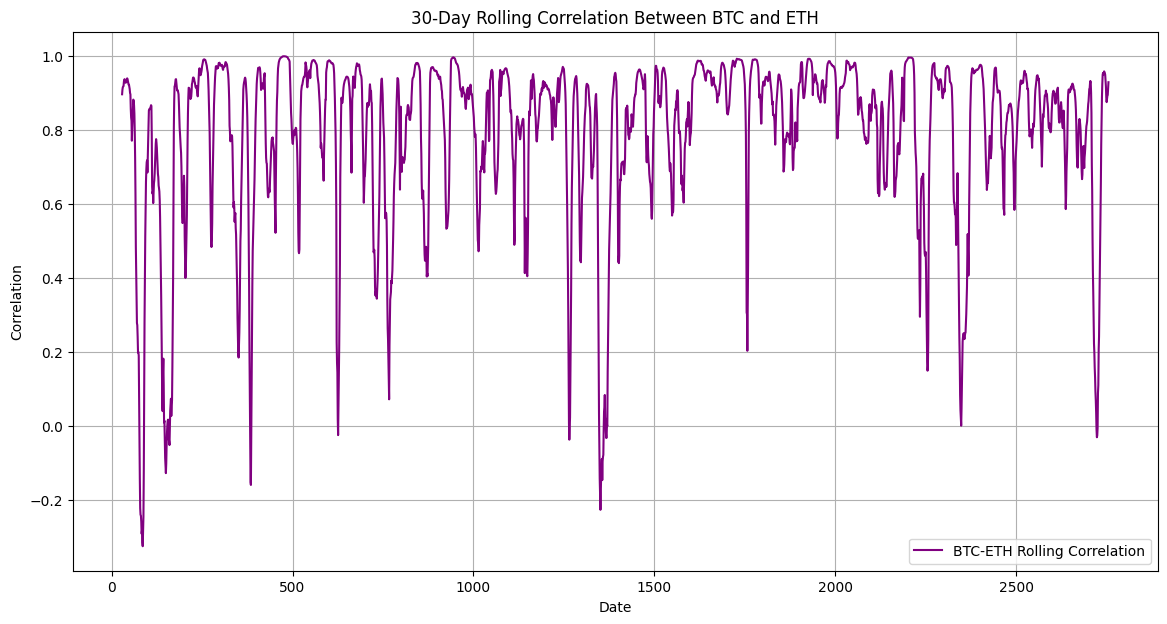

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2751    0.883390
2752    0.891274
2753    0.893263
2754    0.908872
2755    0.928047
Length: 2756, dtype: float64


In [15]:
# Calculate rolling correlation between BTC and ETH
rolling_corr = closing_prices['btc'].rolling(window=30).corr(closing_prices['eth'])

# Plot the rolling correlation
plt.figure(figsize=(14, 7))
plt.plot(closing_prices.index, rolling_corr, label="BTC-ETH Rolling Correlation", color="purple")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.title("30-Day Rolling Correlation Between BTC and ETH")
plt.legend()
plt.grid()
plt.show()
print(rolling_corr)

#### Insights
 - Accoring to the normalized trading volume and closing prices overtime, we can see that the chosen currencies move similarly.
 - According to the correlation matrix, we can see that BTC and ETH have the strongest positive correlation, followed by BTC and XRP. FTT shows a strong negative correlation with BTC, ETH, and XRP.